In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Read the CSV file
df = pd.read_csv("with_grade.csv")
print(df.shape)

(2510, 21)


In [125]:
# Some cleaning up:



# Create new features
df["rent_sqm"] = df["rent"] / df["surface_area"]



In [126]:
# remove all but pasila
df = df[df["address"] == "Höyrykatu 1"]

# remove all but yksiö
df = df[df["type"] == "Yksiö"]
print(df.head())

             location energy_class     condition renovation_year  \
686  Pasila, Helsinki            -  no condition               -   
687  Pasila, Helsinki            -  no condition               -   
688  Pasila, Helsinki            -  no condition               -   
689  Pasila, Helsinki            -  no condition               -   
690  Pasila, Helsinki            -  no condition               -   

     building_year   type      address  rooms  surface_area  count  ...  \
686           2025  Yksiö  Höyrykatu 1  1h+kt          20.5      3  ...   
687           2025  Yksiö  Höyrykatu 1  1h+kt          21.0      1  ...   
688           2025  Yksiö  Höyrykatu 1  1h+kt          21.0     15  ...   
689           2025  Yksiö  Höyrykatu 1  1h+kt          21.0      4  ...   
690           2025  Yksiö  Höyrykatu 1  1h+kt          21.5     10  ...   

     Internet: Trinet Internet: DNA  Remontoitu tai uusi  Sauna  \
686                 0             1                    1      1   
687   

In [127]:
# since the original data contains many apts on a single row, we expand based on the count column.
original_size = len(df)
df = df.loc[df.index.repeat(df['count'])].drop(columns=['count']).reset_index(drop=True)

# Check result
print(f"Original size: {original_size}, Expanded size: {len(df)}") # should be 211 




Original size: 26, Expanded size: 211


## How bad was the educated guess for the prices of the new apartments?

In [128]:
# How wrong was the guess?
mean_rent_sqm = df['rent_sqm'].mean()
print(f"Mean rent per square meter: {mean_rent_sqm:.2f} €")
guess = 27.64
# percentage error
percentage_error = ((mean_rent_sqm - guess) / guess) * 100
print(f"Percentage error compared to guess: {percentage_error:.2f}%")



Mean rent per square meter: 29.29 €
Percentage error compared to guess: 5.97%


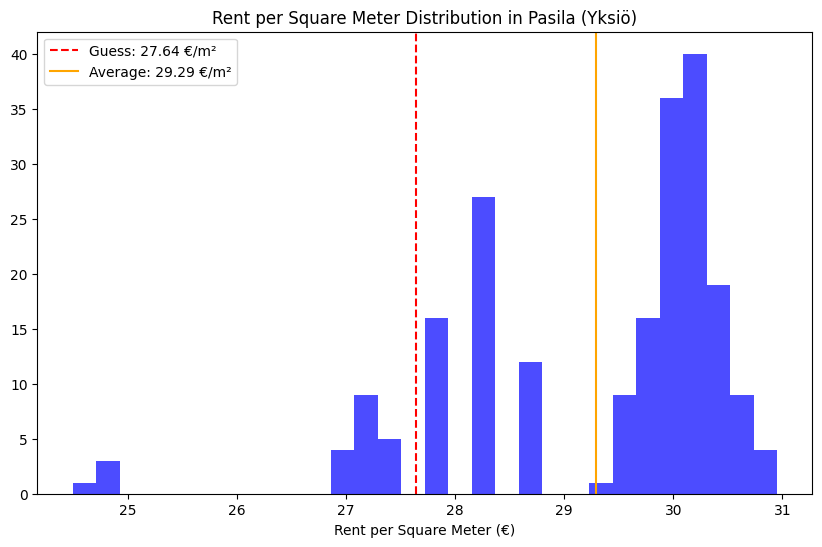

In [129]:
# plot rent_sqm as histogram
plt.figure(figsize=(10, 6))
plt.hist(df['rent_sqm'], bins=30, color='blue', alpha=0.7)
plt.axvline(27.64, color='red', linestyle='--', label='Guess: 27.64 €/m²')
plt.axvline(mean_rent_sqm, color='orange', linestyle='-', label=f'Average: {mean_rent_sqm:.2f} €/m²')
plt.title('Rent per Square Meter Distribution in Pasila (Yksiö)')
plt.xlabel('Rent per Square Meter (€)')
plt.legend()
plt.show()

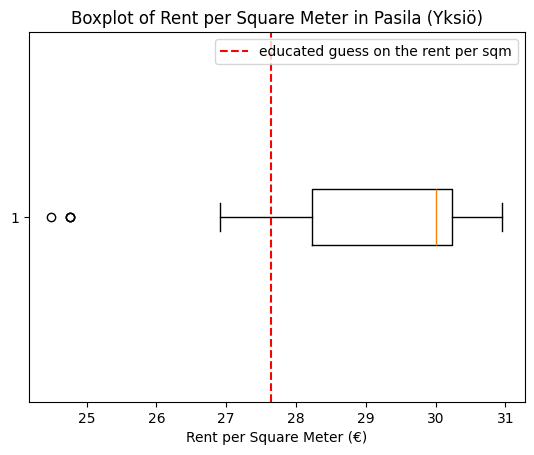

In [130]:
# plot boxplot of rent_sqm
fig, ax = plt.subplots()
ax.boxplot(df['rent_sqm'], vert=False)
ax.set_title('Boxplot of Rent per Square Meter in Pasila (Yksiö)')
ax.axvline(27.64, color='red', linestyle='--', label='educated guess on the rent per sqm')
ax.set_xlabel('Rent per Square Meter (€)')
ax.legend()
plt.show()


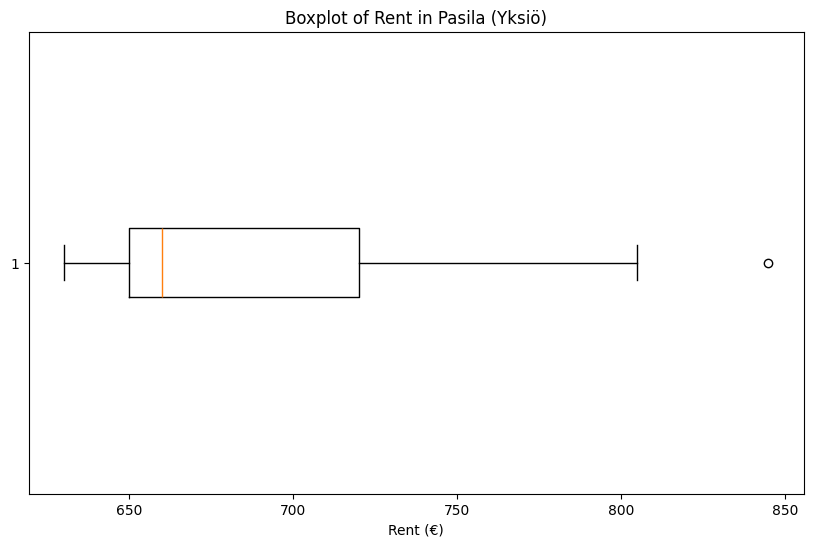

In [131]:
# boxplot of rents 
plt.figure(figsize=(10, 6))
plt.boxplot(df['rent'], vert=False)
plt.title('Boxplot of Rent in Pasila (Yksiö)')
plt.xlabel('Rent (€)')
plt.show()


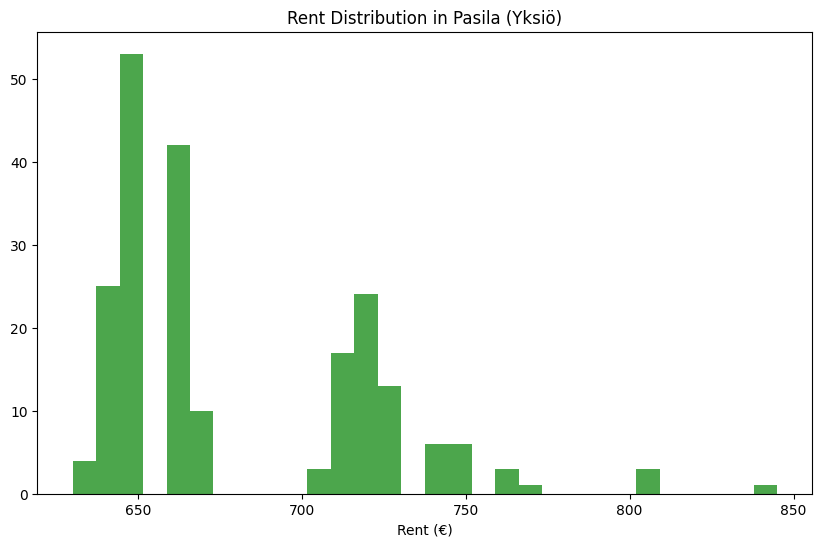

In [132]:
# histogram of rents
plt.figure(figsize=(10, 6))
plt.hist(df['rent'], bins=30, color='green', alpha=0.7)
plt.title('Rent Distribution in Pasila (Yksiö)')
plt.xlabel('Rent (€)')
plt.show()
